In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Segment Animals

The following notebook guides you through the process of segmenting animals in images using the `segment_animals` library. If you haven't installed the library yet, you can do so by running the following code cell.

In [2]:
%pip install segment_animals

/Users/ben/Projects/segment_animals/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


## Importing the Library

To run the segmentation process, you'll need to import `AutoAnimalSegmenter` from the `segment_animals` library. This class provides a simple interface for detecting and segmenting animals in images.

When the `AutoAnimalSegmenter` is initialized, it automatically downloads the necessary model weights and configuration files. This ensures that you have everything you need to start segmenting animals right away.


In [3]:
from segment_animals import AutoAnimalSegmenter

model = AutoAnimalSegmenter()

Bypassing download of already-downloaded file md_v5a.0.0.pt
Model v5a.0.0 available at /var/folders/dq/qzx4kf690mx5k64kl51n29000000gn/T/megadetector_models/md_v5a.0.0.pt


/Users/ben/Projects/segment_animals/.venv/lib/python3.10/site-packages/yolov5/utils/general.py:31: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg


Loading PT detector with compatibility mode classic


Fusing layers... 
Fusing layers... 
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model summary: 733 layers, 140054656 parameters, 0 gradients, 208.8 GFLOPs
Model loaded: <megadetector.detection.pytorch_detector.PTDetector object at 0x151ca45b0>
Model loaded: <megadetector.detection.pytorch_detector.PTDetector object at 0x151ca45b0>


## Loading an Image

The next step is to load an image that you want to segment. You can load the image using the helper `segment_animals.util.load_image` with a file path, a URL or a PIL image.

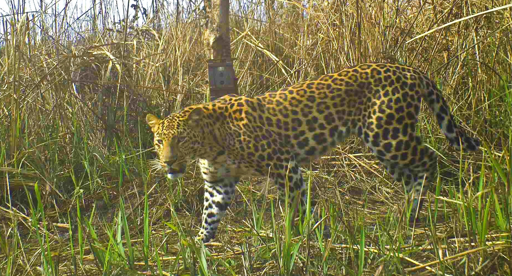

In [4]:
from segment_animals.util import load_image
from segment_animals.viz import thumbnail

image = load_image(
  "https://upload.wikimedia.org/wikipedia/commons/e/eb/Camouflaged_Predator.jpg"
)

thumbnail(image, size=512)

## Processing the Image

Now you have the model and image ready, you can call the `process_image` method of the `AutoAnimalSegmenter` instance. This method takes the image as input and returns a list of animal detections and a list of masks corresponding to each detected animal.

In [5]:
detections, masks = model.process_image(image.convert("RGB"))

f"Found {len(detections)} animals in the image."

'Found 1 animals in the image.'

## Visualizing the Results

To visualize the results, you can use the `segment_animals.viz` toolbox. The `plot_detections_and_masks` function allows you to display the original image along with the detected animals and their corresponding masks overlaid.

/Users/ben/Projects/segment_animals/src/segment_animals/viz.py:66: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


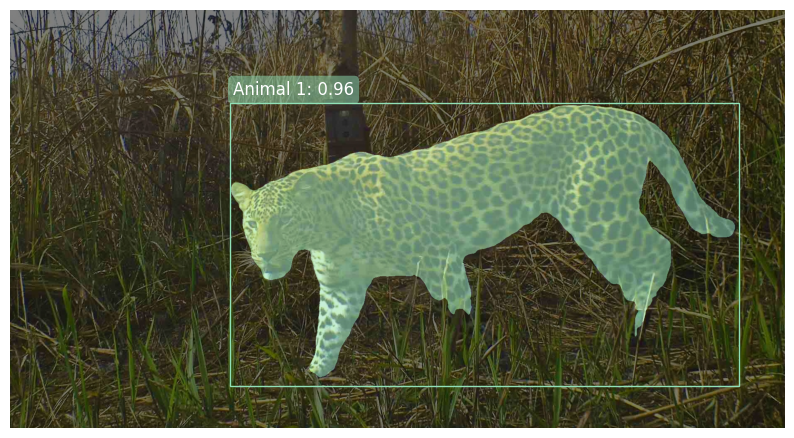

In [6]:
from segment_animals.viz import plot_detections_and_masks

plot_detections_and_masks(image, detections, masks)

To extract just the masked regions of the image, you can use the `extract_masks` function. This function takes the original image and the list of masks, returning a list of images where each image corresponds to a masked animal.

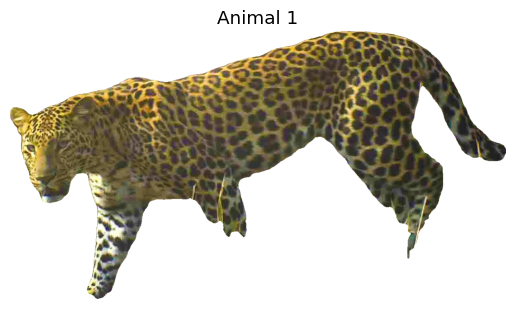

In [11]:
from matplotlib import pyplot as plt
from segment_animals.viz import extract_masks

# Setting whole_image to False will return individual masks cropped to the extent
# of the predicted masks.
for i, mask_extract in enumerate(extract_masks(image, masks, whole_image=False)):
    # mask_extract is a PIL Image object so you can save it or manipulate it further
    # mask_extract.save(f"animal_mask_{i}.png")

    plt.imshow(mask_extract)
    plt.axis("off")
    plt.title(f"Animal {i + 1}")
    plt.show()

